# State teleportation

In [1]:
import photonqat as pq
import numpy as np
import matplotlib.pyplot as plt

## Photonqat

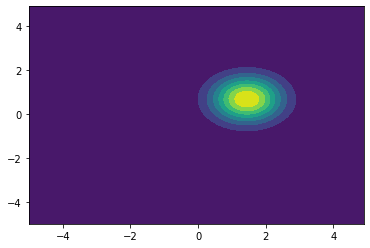

measured x = 1.6055174085067798
measured p = -0.11799534873304879
mu = [1.44501786 0.6756677 ]


In [3]:
r = 2

G = pq.Gaussian(3)

G.D(0, 1 + 0.5j) # state to teleport
G.S(1, -r)
G.S(2, r)
G.BS(1, 2, np.pi/4) # 50:50 beam splitter
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
x0 = G.MeasX(0)
p1 = G.MeasP(1)
G.Xgate(2, x0 * np.sqrt(2))
G.Zgate(2, p1 * np.sqrt(2))

G.Wigner(2) # plot
print('measured x =', x0)
print('measured p =', p1)
print('mu =', G.mean(2)) # mu of qumode 0